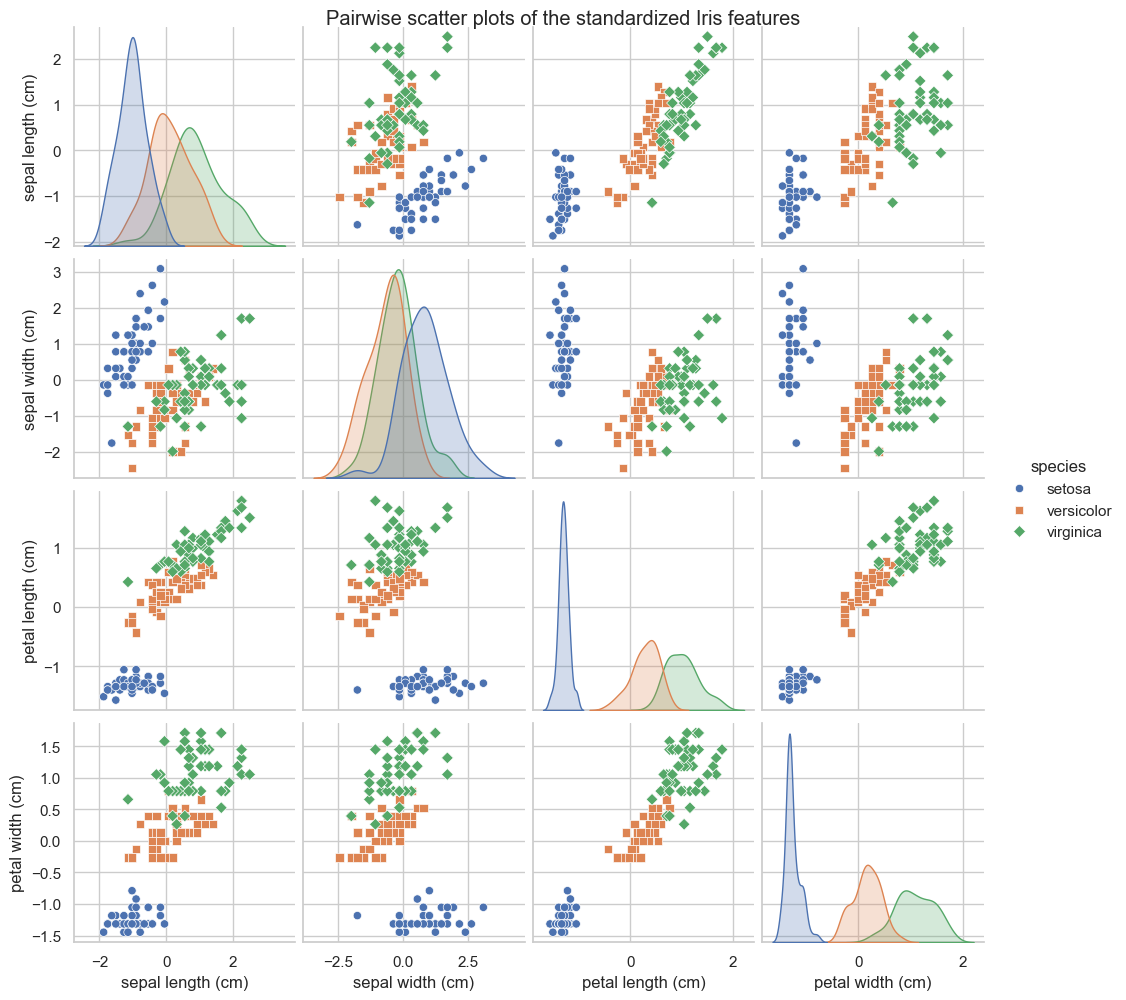

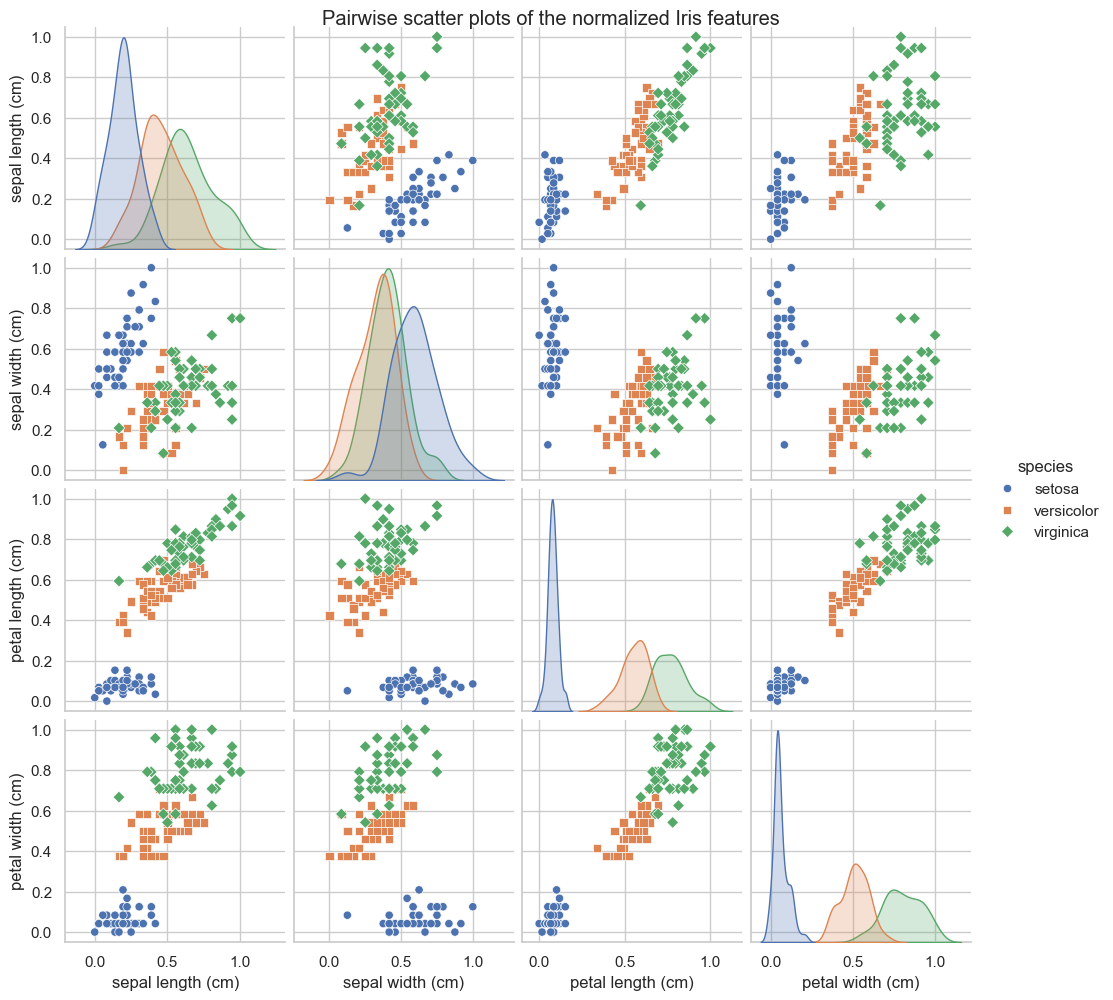

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Standardization
scaler_standard = StandardScaler()
df_standardized = pd.DataFrame(scaler_standard.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])
df_standardized['species'] = df['species']

# Normalization
scaler_normalize = MinMaxScaler()
df_normalized = pd.DataFrame(scaler_normalize.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])
df_normalized['species'] = df['species']

# Visualize the standardized data
sns.pairplot(df_standardized, hue="species", markers=["o", "s", "D"])
plt.suptitle('Pairwise scatter plots of the standardized Iris features', verticalalignment='bottom')
plt.show()

# Visualize the normalized data
sns.pairplot(df_normalized, hue="species", markers=["o", "s", "D"])
plt.suptitle('Pairwise scatter plots of the normalized Iris features', verticalalignment='bottom')
plt.show()


In [25]:
import numpy as np

def initialize_centroids(X, k):
    # Randomly choose k data points as initial centroids
    np.random.seed(42)  # For reproducibility
    return X[np.random.choice(X.shape[0], k, replace=False)]

def assign_clusters(X, centroids):
    # Assign clusters based on closest centroid
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    # Update centroids to be the mean of points in each cluster
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

def kmeans(X, k, max_iters=1, tol=1e-4):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
    return labels, centroids

# Apply the k-means clustering algorithm to the standardized data
k = 3
X_standardized = df_standardized.iloc[:, :-1].values  # Using the standardized data
labels, centroids = kmeans(X_standardized, k)

print("Cluster labels:", labels)
print("Centroids:", centroids)


Cluster labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 0 2 2
 0 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
Centroids: [[-0.01139555 -0.87600831  0.37707573  0.31115341]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.16743407  0.14530299  1.00302557  1.0300019 ]]


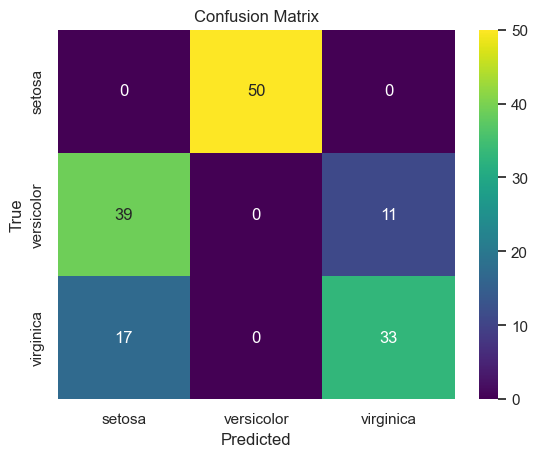

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compare clusters with actual species
true_labels = iris.target
conf_matrix = confusion_matrix(true_labels, labels)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Cluster labels (scikit-learn): [1 2 2 2 1 1 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 2 2 1
 1 2 1 1 2 2 1 1 2 1 2 1 1 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Centroids (scikit-learn): [[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]]


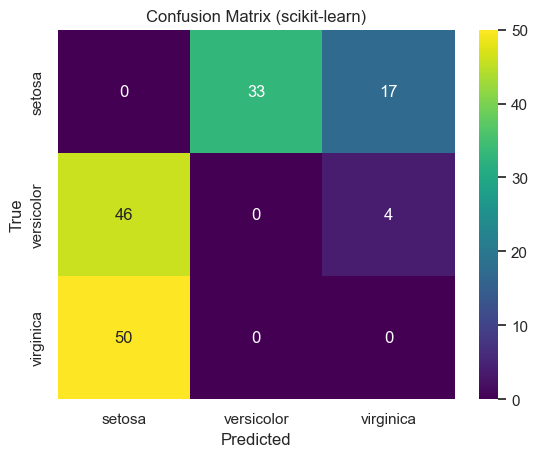

In [15]:
from sklearn.cluster import KMeans

kmeans_sklearn = KMeans(n_clusters=3, random_state=42)
kmeans_sklearn.fit(X_standardized)
labels_sklearn = kmeans_sklearn.labels_
centroids_sklearn = kmeans_sklearn.cluster_centers_

print("Cluster labels (scikit-learn):", labels_sklearn)
print("Centroids (scikit-learn):", centroids_sklearn)

# Compare clusters with actual species using scikit-learn
conf_matrix_sklearn = confusion_matrix(true_labels, labels_sklearn)

sns.heatmap(conf_matrix_sklearn, annot=True, fmt="d", cmap="viridis", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (scikit-learn)')
plt.show()


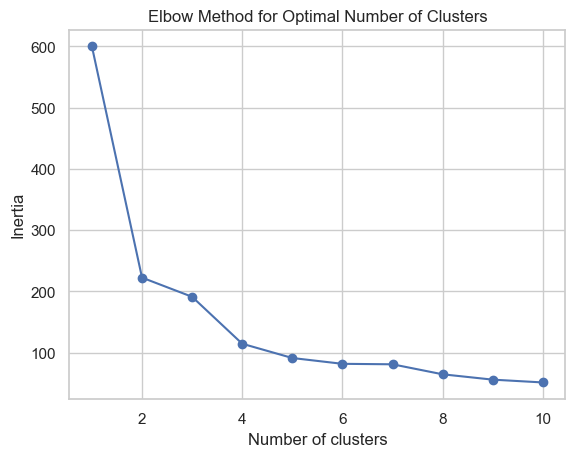

In [16]:
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_standardized)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()
